In [1]:
import os
# os.environ["KERAS_BACKEND"] = "jax"

import gc
import numpy as np
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt

import tensorflow as tf
# import jax
import keras

from sklearn import metrics

from tqdm.notebook import tqdm

print(tf.__version__)
# print(jax.__version__)

2.16.1


In [8]:
sample = pl.read_csv('leap-atmospheric-physics-ai-climsim/train.csv', n_rows=1)
TARGETS = ['ptend_t_59',
 'ptend_q0001_0',
 'ptend_q0001_1',
 'ptend_q0001_2',
 'ptend_q0001_3',
 'ptend_q0001_4',
 'ptend_q0001_5',
 'ptend_q0001_6',
 'ptend_q0001_7',
 'ptend_q0001_8',
 'ptend_q0001_9',
 'ptend_q0001_10',
 'ptend_q0001_11',
 'ptend_q0001_12',
 'ptend_q0001_13',
 'ptend_q0001_14',
 'ptend_q0001_59',
 'ptend_q0002_0',
 'ptend_q0002_1',
 'ptend_q0002_2',
 'ptend_q0002_3',
 'ptend_q0002_4',
 'ptend_q0002_5',
 'ptend_q0002_6',
 'ptend_q0002_7',
 'ptend_q0002_8',
 'ptend_q0002_9',
 'ptend_q0002_10',
 'ptend_q0002_11',
 'ptend_q0002_59',
 'ptend_q0003_0',
 'ptend_q0003_1',
 'ptend_q0003_2',
 'ptend_q0003_3',
 'ptend_q0003_4',
 'ptend_q0003_5',
 'ptend_q0003_6',
 'ptend_q0003_7',
 'ptend_q0003_8',
 'ptend_q0003_9',
 'ptend_q0003_10',
 'ptend_q0003_11',
 'ptend_q0003_12',
 'ptend_q0003_13',
 'ptend_q0003_14',
 'ptend_q0003_59',
 'ptend_u_0',
 'ptend_u_1',
 'ptend_u_2',
 'ptend_u_3',
 'ptend_u_4',
 'ptend_u_5',
 'ptend_u_6',
 'ptend_u_7',
 'ptend_u_8',
 'ptend_u_9',
 'ptend_u_10',
 'ptend_u_59',
 'ptend_v_0',
 'ptend_v_1',
 'ptend_v_2',
 'ptend_v_3',
 'ptend_v_4',
 'ptend_v_5',
 'ptend_v_6',
 'ptend_v_7',
 'ptend_v_8',
 'ptend_v_9',
 'ptend_v_10']

all_columns = sample.columns 

df = pd.DataFrame(np.load('data/split_80.npy'), columns=all_columns[1:])
# df = df[TARGETS]
df

,state_t_0,state_t_1,state_t_2,state_t_3,state_t_4,state_t_5,state_t_6,state_t_7,state_t_8,state_t_9,...,ptend_v_58,ptend_v_59,cam_out_NETSW,cam_out_FLWDS,cam_out_PRECSC,cam_out_PRECC,cam_out_SOLS,cam_out_SOLL,cam_out_SOLSD,cam_out_SOLLD
0,208.658118,219.701450,226.161147,240.985567,253.205655,259.621236,256.543020,249.431283,241.374536,235.454901,...,-0.000025,-0.000064,749.787833,463.026916,0.000000e+00,0.000000e+00,406.919319,410.479690,77.834794,42.569765
1,213.236893,219.050181,223.518860,239.962042,251.208889,260.839186,261.632174,254.148949,243.372534,236.030694,...,0.000022,-0.000029,869.433781,433.649563,0.000000e+00,0.000000e+00,439.854610,478.956101,47.730273,3.902452
2,213.459039,222.984955,225.797672,240.686876,252.136041,260.091117,259.909179,252.891811,242.928951,236.003179,...,0.000049,-0.000023,623.457314,425.177705,0.000000e+00,0.000000e+00,402.931992,452.147981,74.880919,16.195758
3,203.696568,221.114488,234.028717,243.814029,249.745758,252.633634,246.830598,239.542550,230.838900,223.948473,...,-0.000013,0.000036,271.913023,374.335726,0.000000e+00,2.438491e-08,91.581837,51.832125,78.315777,67.007017
4,204.201616,226.653925,236.931255,246.613708,249.037666,250.522264,243.483571,236.546278,228.514074,221.966642,...,0.000031,0.000045,111.802029,368.515205,0.000000e+00,8.091569e-09,16.932823,17.845068,59.181927,25.951051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100910,217.603397,225.788945,238.813392,251.669118,260.556241,263.211869,258.604807,250.585563,241.168190,233.390400,...,0.000004,0.000005,123.289036,270.856794,9.225945e-11,2.155572e-10,36.422585,54.201998,33.695190,20.201394
100911,210.472756,220.113530,235.939518,250.744730,261.476750,265.348370,260.469377,250.856974,239.830834,231.195137,...,0.000017,-0.000026,0.000000,285.852991,2.561860e-10,2.164347e-09,0.000000,0.000000,0.000000,0.000000
100912,211.740826,220.668294,230.921068,245.599845,257.125368,262.621489,259.822587,251.365093,240.598354,232.068410,...,-0.000013,-0.000005,0.000000,310.213536,0.000000e+00,2.738527e-12,0.000000,0.000000,0.000000,0.000000
100913,206.693809,216.717853,233.272190,248.277468,259.869647,264.537524,260.670772,251.808104,241.428010,233.134656,...,0.000026,-0.000045,62.854243,264.369715,0.000000e+00,0.000000e+00,14.518944,34.887601,19.172568,5.820020


In [7]:
df.describe()

,ptend_t_59,ptend_q0001_0,ptend_q0001_1,ptend_q0001_2,ptend_q0001_3,ptend_q0001_4,ptend_q0001_5,ptend_q0001_6,ptend_q0001_7,ptend_q0001_8,...,ptend_v_1,ptend_v_2,ptend_v_3,ptend_v_4,ptend_v_5,ptend_v_6,ptend_v_7,ptend_v_8,ptend_v_9,ptend_v_10
count,100915.000000,1.009150e+05,1.009150e+05,1.009150e+05,1.009150e+05,100915.0,100915.0,100915.0,100915.0,100915.0,...,100915.0,100915.0,100915.0,100915.0,100915.0,100915.0,100915.0,100915.0,100915.0,100915.0
mean,-0.000060,-1.501600e-16,1.513224e-17,2.576545e-17,7.380203e-18,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.000074,9.894698e-15,8.775600e-15,1.057909e-14,5.647969e-15,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,-0.001253,-1.766429e-12,-8.431891e-13,-2.498427e-12,-1.036193e-12,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,-0.000082,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,-0.000042,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,-0.000019,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.000476,2.419841e-14,9.849144e-13,1.808180e-12,1.431745e-12,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
corr = df.corr()
# keep last 368 columns
corr = corr.iloc[-368:, -368:]
# keep rows for TARGETS
corrt = corr.loc[TARGETS]

In [14]:
# show all rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
corrt

,ptend_t_0,ptend_t_1,ptend_t_2,ptend_t_3,ptend_t_4,ptend_t_5,ptend_t_6,ptend_t_7,ptend_t_8,ptend_t_9,ptend_t_10,ptend_t_11,ptend_t_12,ptend_t_13,ptend_t_14,ptend_t_15,ptend_t_16,ptend_t_17,ptend_t_18,ptend_t_19,ptend_t_20,ptend_t_21,ptend_t_22,ptend_t_23,ptend_t_24,ptend_t_25,ptend_t_26,ptend_t_27,ptend_t_28,ptend_t_29,ptend_t_30,ptend_t_31,ptend_t_32,ptend_t_33,ptend_t_34,ptend_t_35,ptend_t_36,ptend_t_37,ptend_t_38,ptend_t_39,ptend_t_40,ptend_t_41,ptend_t_42,ptend_t_43,ptend_t_44,ptend_t_45,ptend_t_46,ptend_t_47,ptend_t_48,ptend_t_49,ptend_t_50,ptend_t_51,ptend_t_52,ptend_t_53,ptend_t_54,ptend_t_55,ptend_t_56,ptend_t_57,ptend_t_58,ptend_t_59,ptend_q0001_0,ptend_q0001_1,ptend_q0001_2,ptend_q0001_3,ptend_q0001_4,ptend_q0001_5,ptend_q0001_6,ptend_q0001_7,ptend_q0001_8,ptend_q0001_9,ptend_q0001_10,ptend_q0001_11,ptend_q0001_12,ptend_q0001_13,ptend_q0001_14,ptend_q0001_15,ptend_q0001_16,ptend_q0001_17,ptend_q0001_18,ptend_q0001_19,ptend_q0001_20,ptend_q0001_21,ptend_q0001_22,ptend_q0001_23,ptend_q0001_24,ptend_q0001_25,ptend_q0001_26,ptend_q0001_27,ptend_q0001_28,ptend_q0001_29,ptend_q0001_30,ptend_q0001_31,ptend_q0001_32,ptend_q0001_33,ptend_q0001_34,ptend_q0001_35,ptend_q0001_36,ptend_q0001_37,ptend_q0001_38,ptend_q0001_39,ptend_q0001_40,ptend_q0001_41,ptend_q0001_42,ptend_q0001_43,ptend_q0001_44,ptend_q0001_45,ptend_q0001_46,ptend_q0001_47,ptend_q0001_48,ptend_q0001_49,ptend_q0001_50,ptend_q0001_51,ptend_q0001_52,ptend_q0001_53,ptend_q0001_54,ptend_q0001_55,ptend_q0001_56,ptend_q0001_57,ptend_q0001_58,ptend_q0001_59,ptend_q0002_0,ptend_q0002_1,ptend_q0002_2,ptend_q0002_3,ptend_q0002_4,ptend_q0002_5,ptend_q0002_6,ptend_q0002_7,ptend_q0002_8,ptend_q0002_9,ptend_q0002_10,ptend_q0002_11,ptend_q0002_12,ptend_q0002_13,ptend_q0002_14,ptend_q0002_15,ptend_q0002_16,ptend_q0002_17,ptend_q0002_18,ptend_q0002_19,ptend_q0002_20,ptend_q0002_21,ptend_q0002_22,ptend_q0002_23,ptend_q0002_24,ptend_q0002_25,ptend_q0002_26,ptend_q0002_27,ptend_q0002_28,ptend_q0002_29,ptend_q0002_30,ptend_q0002_31,ptend_q0002_32,ptend_q0002_33,ptend_q0002_34,ptend_q0002_35,ptend_q0002_36,ptend_q0002_37,ptend_q0002_38,ptend_q0002_39,ptend_q0002_40,ptend_q0002_41,ptend_q0002_42,ptend_q0002_43,ptend_q0002_44,ptend_q0002_45,ptend_q0002_46,ptend_q0002_47,ptend_q0002_48,ptend_q0002_49,ptend_q0002_50,ptend_q0002_51,ptend_q0002_52,ptend_q0002_53,ptend_q0002_54,ptend_q0002_55,ptend_q0002_56,ptend_q0002_57,ptend_q0002_58,ptend_q0002_59,ptend_q0003_0,ptend_q0003_1,ptend_q0003_2,ptend_q0003_3,ptend_q0003_4,ptend_q0003_5,ptend_q0003_6,ptend_q0003_7,ptend_q0003_8,ptend_q0003_9,ptend_q0003_10,ptend_q0003_11,ptend_q0003_12,ptend_q0003_13,ptend_q0003_14,ptend_q0003_15,ptend_q0003_16,ptend_q0003_17,ptend_q0003_18,ptend_q0003_19,ptend_q0003_20,ptend_q0003_21,ptend_q0003_22,ptend_q0003_23,ptend_q0003_24,ptend_q0003_25,ptend_q0003_26,ptend_q0003_27,ptend_q0003_28,ptend_q0003_29,ptend_q0003_30,ptend_q0003_31,ptend_q0003_32,ptend_q0003_33,ptend_q0003_34,ptend_q0003_35,ptend_q0003_36,ptend_q0003_37,ptend_q0003_38,ptend_q0003_39,ptend_q0003_40,ptend_q0003_41,ptend_q0003_42,ptend_q0003_43,ptend_q0003_44,ptend_q0003_45,ptend_q0003_46,ptend_q0003_47,ptend_q0003_48,ptend_q0003_49,ptend_q0003_50,ptend_q0003_51,ptend_q0003_52,ptend_q0003_53,ptend_q0003_54,ptend_q0003_55,ptend_q0003_56,ptend_q0003_57,ptend_q0003_58,ptend_q0003_59,ptend_u_0,ptend_u_1,ptend_u_2,ptend_u_3,ptend_u_4,ptend_u_5,ptend_u_6,ptend_u_7,ptend_u_8,ptend_u_9,ptend_u_10,ptend_u_11,ptend_u_12,ptend_u_13,ptend_u_14,ptend_u_15,ptend_u_16,ptend_u_17,ptend_u_18,ptend_u_19,ptend_u_20,ptend_u_21,ptend_u_22,ptend_u_23,ptend_u_24,ptend_u_25,ptend_u_26,ptend_u_27,ptend_u_28,ptend_u_29,ptend_u_30,ptend_u_31,ptend_u_32,ptend_u_33,ptend_u_34,ptend_u_35,ptend_u_36,ptend_u_37,ptend_u_38,ptend_u_39,ptend_u_40,ptend_u_41,ptend_u_42,ptend_u_43,ptend_u_44,ptend_u_45,ptend_u_46,ptend_u_47,ptend_u_48,ptend_u_49,ptend_u_50,ptend_u_51,ptend_u_52,ptend_u_53,ptend_u_54,ptend_u_55,ptend_u_56,ptend_u_57,ptend_u_58,ptend_u_59,ptend_v_0,ptend_v_1,ptend_v_2

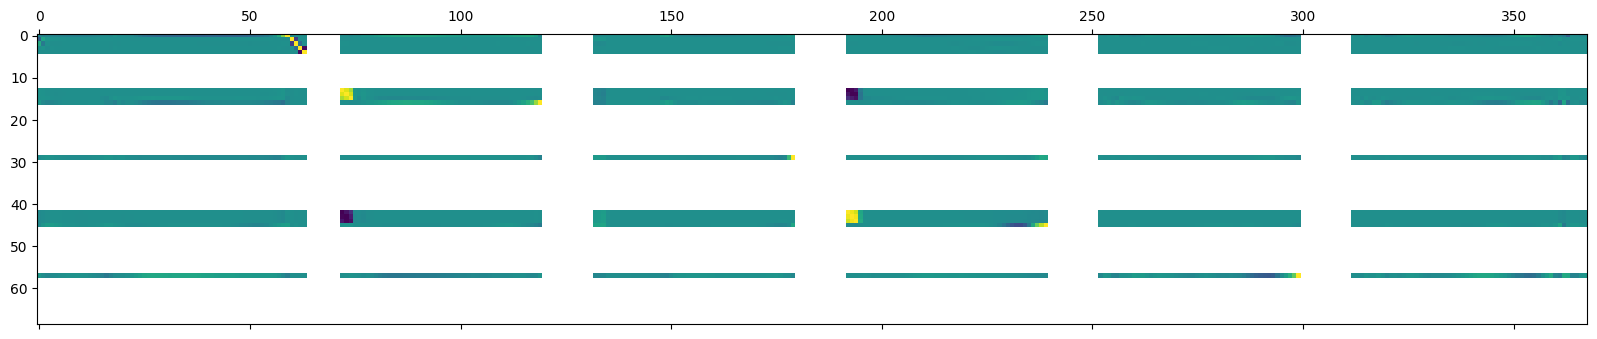

In [16]:
# plot the correlation matrix with matplotlib
plt.figure(figsize=(20, 20))
plt.matshow(corrt, fignum=1)
plt.show()

Mean Absolute Error: 2.363483804555728e-05
Mean Squared Error: 1.138008885566538e-09
Root Mean Squared Error: 3.3734387286069655e-05


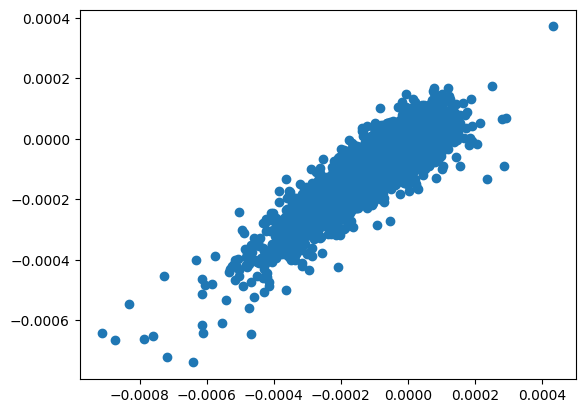

In [17]:
# linear regression ptend_t_59 from the inputs
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df.drop(columns=TARGETS)
y = df['ptend_t_59']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# plot the predictions
plt.scatter(y_test, y_pred)

Mean Absolute Error: 6.890293314239413e-06
Mean Squared Error: 1.667605645761743e-10
Root Mean Squared Error: 1.2913580625689155e-05


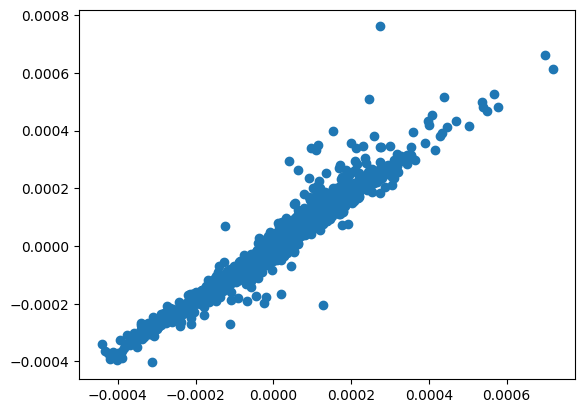

In [18]:
# linear regression ptend_u_59 from the inputs
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df.drop(columns=TARGETS)
y = df['ptend_u_59']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# plot the predictions
plt.scatter(y_test, y_pred)

Mean Absolute Error: 8.269093159483825e-16
Mean Squared Error: 1.3972999963533136e-28
Root Mean Squared Error: 1.1820744461975793e-14


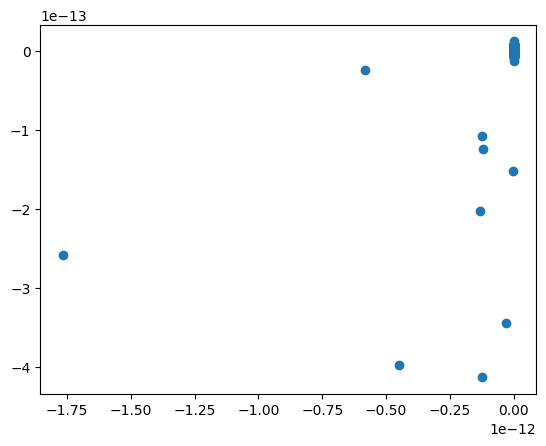

In [19]:
# linear regression ptend_q0001_0 from the inputs
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df.drop(columns=TARGETS)
y = df['ptend_q0001_0']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# plot the predictions
plt.scatter(y_test, y_pred)